# Real-world Data Wrangling

In [455]:
#import necceserry library
import pandas as pd
import numpy as np
import zipfile
import requests
from bs4 import BeautifulSoup
import json
import os
import matplotlib.pyplot as plt

In [347]:
!python -m pip install kaggle==1.6.12

In [348]:
!pip install --target=/workspace ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Using cached certifi-2024.6.2-py3-none-any.whl (164 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl (16.5 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Using cached six-1.16.0-py2.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.0 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.0.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.0 which is incompatible.
scipy 1.11.4 requires numpy<

# 1. Gather data
In this section, i extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

# 1.1. Problem Statement
This project aims to explore the relationship between social media sentiment and e-commerce sales. By wrangling and analyzing datasets from e-commerce sales (including transaction details and customer demographics) and social media sentiment data (particularly product reviews and customer feedback), we will investigate how positive, negative, and neutral sentiments on social media platforms influence sales trends. The goal is to identify patterns and correlations that can help businesses improve their marketing strategies and customer engagement.

# 1.2. Gather at least two datasets using two different data gathering methods¶

# Dataset 1
Type:  CSV File

Method:he data was gathered using the "Downloading files" method from Kaggle source.)

Dataset variables:

InvoiceNo: Unique identifier for each transaction

StockCode: Unique product code for each item

Description: Detailed description of the product

Quantity: Number of units sold in each transaction 
negative mean t looks like you have a dataset or some examples where the Quantity field has negative values, which typically indicate returns or cancellations in transactions (denoted by the 'C' prefix in InvoiceNo).i dont need to drop it

invoiceDate: Date and time when the transaction was generated

UnitPrice: Price per unit of the product

CustomerID: Unique identifier for each customer

Country: Country where the customer resides

In [349]:
df_1=pd.read_csv('E_eco.csv',encoding='latin-1')
df_1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Dataset 2
About Dataset

type:html
method: Extract your dataset via scraping(https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews),Extract my dataset via scraping using requests, and BeautifulSoup

● userId : Every user identified with a unique id (First Column)

● productId : Every product identified with a unique id(Second Column)

● Rating : Rating of the corresponding product by the corresponding user(Third Column)

● timestamp : Time of the rating ( Fourth Column)

In [350]:
##FILL IN - extract a dataset via scraping
url = 'https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews'
data = requests.get(url)
#Raise an exception if we made a request resulting in an error
data.raise_for_status()
#Access the content of the response in Unicode
data_txt = data.text

In [351]:
#FILL IN
#Use BeautifulSoup to parse the XML
soup_text = BeautifulSoup(data_txt)
#Print the prettified version
soup_text.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <title>\n   Amazon Product Reviews  | Kaggle\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow" name="robots"/>\n  <meta content="Electronic_Products User Ratings" name="description"/>\n  <meta content="ratings and reviews,e-commerce services" name="keywords"/>\n  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0" name="viewport"/>\n  <meta content="#008ABC" name="theme-color"/>\n  <script nonce="YoXYDZkoOHwQ7NZf1mCkSA==" type="text/javascript">\n   window["pageRequestStartTime"] = 1719928496488;\r\n    window["pageRequestEndTime"] = 1719928496587;\r\n    window["initialPageLoadStartTime"] = new Date().getTime();\n  </script>\n  <script async="" defer="" id="gsi-client" nonce="YoXYDZkoOHwQ7NZf1mCkSA==" src="https://accounts.google.com/gsi/client">\n  </script>\n  <script nonce="YoXYDZkoOHwQ7NZf1mCkSA==">\n   window.KAGGLE_JUPYTERLAB_PATH = "/static/assets/jupyterlab/jupyterlab-i

In [352]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


i want to woek easily,so i show the data using csv

In [353]:
#to woek easy
df_2 = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ratings_Electronics (1).csv')

In [354]:
df_2.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


# 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

# Quality Issue 1:
for the first dataset ,lets check if there missing value(completness)

In [355]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


 we saw that we have missing values

# Quality Issue 2: 
for the first dataset ,lets check if there duplicate value

In [356]:
df_1.duplicated().sum()

5268

we see that we have duplicated value

# Quality Issue 3
check the Validity for data types

In [357]:
df_1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

we see that InvoiceDate as object instead datetime

# Tidiness Issue 1
:Column headers are values, rather than variable names(seconed dataset)

In [358]:
df_2.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


we see that the headers as value instead variable

# Tidiness Issue 2
Multiple variables are stored in one column(first_dataset)

In [359]:
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


we see that InvoiceDate contain date and time in the same time

In [360]:
df_1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Quality issue 4(validity)
:The entry you provided with a negative UnitPrice and “Adjust bad debt” in the Description typically indicates a transaction related to accounting for bad debts or adjustments. In such cases

 Exclude for Sales Analysis: my analysis focuses strictly on sales and pricing, you might consider excluding entries like these as they don't represent typical sales transactions.

In [361]:
df_1['UnitPrice'].idxmin()

299983

In [362]:
print(df_1.iloc[df_1['UnitPrice'].idxmin()]) 


InvoiceNo              A563186
StockCode                    B
Description    Adjust bad debt
Quantity                     1
InvoiceDate    8/12/2011 14:51
UnitPrice            -11062.06
CustomerID                 NaN
Country         United Kingdom
Name: 299983, dtype: object


In [363]:
negative_price_indices = df_1[df_1['UnitPrice'] < 0].index
negative_price_indices

Index([299983, 299984], dtype='int64')

In [364]:
print(df_1.iloc[299984])

InvoiceNo              A563187
StockCode                    B
Description    Adjust bad debt
Quantity                     1
InvoiceDate    8/12/2011 14:52
UnitPrice            -11062.06
CustomerID                 NaN
Country         United Kingdom
Name: 299984, dtype: object


In [365]:
print(df_1.iloc[299983])

InvoiceNo              A563186
StockCode                    B
Description    Adjust bad debt
Quantity                     1
InvoiceDate    8/12/2011 14:51
UnitPrice            -11062.06
CustomerID                 NaN
Country         United Kingdom
Name: 299983, dtype: object


# 3. Clean data

In [366]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes
df_3=df_1.copy()
df_4=df_2.copy()

# Quality Issue 1:
for the first dataset ,lets check if there missing value(completness)

In [367]:
df_3.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [368]:
df_3.shape

(541909, 8)

for theCustomerID i will drop this column and Description  1454  i will drop the raw

In [369]:
df_3 = df_3.dropna(subset=['Description'])

In [370]:
df_3 = df_3.drop('CustomerID', axis=1)

In [371]:
df_3.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [372]:
assert df_3.isnull().sum().sum()==0

 this problem was solved!

# Quality Issue 2:
for the first dataset ,lets check if there duplicate value

In [373]:
df_3.duplicated().sum()

5268

In [374]:
df_3.duplicated().index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906, 541907,
       541908],
      dtype='int64', length=540455)

In [375]:
duplicated_rows = df_3[df_3.duplicated()]

In [379]:
duplicated_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,United Kingdom
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,United Kingdom


In [382]:
df_3=df_3.drop_duplicates(subset=['InvoiceNo'])

In [383]:
df_3.duplicated().sum()

0

In [385]:
assert df_3.duplicated().sum()==0

i drop duplicated rows after first occures 
 Validate the cleaning was successful programmitaclly

# Quality Issue 3
check the Validity for data types

In [386]:
df_3.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
Country         object
dtype: object

In [387]:
df_3['InvoiceDate']=pd.to_datetime(df_3['InvoiceDate'])

In [388]:
df_3.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object

we are done convert InvoiceDate to datetime

# Quality issue 4(validity)
:The entry you provided with a negative UnitPrice and “Adjust bad debt” in the Description typically indicates a transaction related to accounting for bad debts or adjustments. In such cases

Exclude for Sales Analysis: my analysis focuses strictly on sales and pricing, you might consider excluding entries like these as they don't represent typical sales transactions.

In [389]:
df_3=df_3.drop(negative_price_indices)

we are done xcluding entries like these as they don't represent typical sales transactions.

# Tidiness Issue 1
:Column headers are values, rather than variable names(seconed dataset)

In [391]:
df_4.columns = ['userId', 'productId', 'Rating', 'timestamp']

In [392]:
df_4.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


we are done(culumn header variable not values)

# Tidiness Issue 2
Multiple variables are stored in one column(first_dataset)

In [394]:
df_3['InvoiceDate'] = df_3['InvoiceDate'].astype(str)
df_3[['InvoiceDate', 'InvoiceTime']] = df_3['InvoiceDate'].str.split(' ', expand=True)

In [396]:
df_3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,United Kingdom,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,United Kingdom,08:34:00
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01,4.25,United Kingdom,08:34:00
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01,5.95,United Kingdom,08:35:00


In [406]:
df_3['InvoiceDate']=pd.to_datetime(df_3['InvoiceDate'])

In [408]:
df_3['InvoiceTime']=pd.to_datetime(df_3['InvoiceTime'])

In [409]:
# Convert 'InvoiceDate' column to datetime type
df_3['InvoiceDate'] = pd.to_datetime(df_3['InvoiceDate'])

# Format the dates in the 'InvoiceDate' column
df_3['InvoiceDate'] = df_3['InvoiceDate'].dt.strftime("%d, %B %Y")

In [400]:
df_3.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
InvoiceTime    datetime64[ns]
dtype: object

In [410]:
df_3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,"01, December 2010",2.55,United Kingdom,2024-07-02 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,"01, December 2010",1.85,United Kingdom,2024-07-02 08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,"01, December 2010",1.69,United Kingdom,2024-07-02 08:34:00
21,536368,22960,JAM MAKING SET WITH JARS,6,"01, December 2010",4.25,United Kingdom,2024-07-02 08:34:00
25,536369,21756,BATH BUILDING BLOCK WORD,3,"01, December 2010",5.95,United Kingdom,2024-07-02 08:35:00


In [415]:
df_3['InvoiceDate']=pd.to_datetime(df_3['InvoiceDate'])

In [416]:
df_3.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
InvoiceTime    datetime64[ns]
dtype: object

In [418]:
assert df_3['InvoiceDate'].dtype == 'datetime64[ns]'
assert df_3['InvoiceTime'].dtype == 'datetime64[ns]'

we are don format the date and seperate in two columns

In [419]:
df_4.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [438]:
df_3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceTime,userId
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,2024-07-02 08:26:00,A2CX7LUOHB2NDG
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,United Kingdom,2024-07-02 08:28:00,A34ATBPOK6HCHY
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,United Kingdom,2024-07-02 08:34:00,AZYNQZ94U6VDB
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01,4.25,United Kingdom,2024-07-02 08:34:00,A2AEHUKOV014BP
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01,5.95,United Kingdom,2024-07-02 08:35:00,AYTBGUX49LF3W


# Remove unnecessary variables and combine datasets
Depending on the datasets, you can also peform the combination before the cleaning steps.

In [432]:
df_3['userId']=df_4['userId']

In [469]:
df_3s=df_3.copy()
df_3s = df_3[['userId', 'InvoiceNo', 'StockCode', 'Description','Quantity','InvoiceDate']]
df_3s.head()

,userId,InvoiceNo,StockCode,Description,Quantity,InvoiceDate
0,A2CX7LUOHB2NDG,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01
7,A34ATBPOK6HCHY,536366,22633,HAND WARMER UNION JACK,6,2010-12-01
9,AZYNQZ94U6VDB,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01
21,A2AEHUKOV014BP,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01
25,AYTBGUX49LF3W,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01


 for first dataset
 i make dataframe after removing unnecessary variables and make user id in dataset to make it as key for merge

In [443]:
df_4s=df_4.copy()
df_4s=df_4[['userId','productId','Rating']]

In [444]:
df_4s.head()

,userId,productId,Rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


for seconed data set,i keep the neccessary variable for my question and remove timestamp attribute 


In [470]:
df_merge=pd.merge(df_3s, df_4s,on='userId', how='inner')

In [471]:
df_merge.sample(2)

,userId,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,productId,Rating
56400,A3QI0S9V8MD3LW,545725,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2011-03-07,B000056B8A,5.0
175820,AZ5JTKXS6ZGJ9,577748,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,2011-11-21,B004SD2562,5.0


# 4. Update your data store
Update my local database/data store with the cleaned data, following best practices for storing my cleaned data:

In [449]:

# Your cleaned data DataFrame after wrangling
df_cleaned = df_merge.copy()
# Save cleaned data
df_cleaned.to_csv('cleaned_data.csv', index=False)

# 5. Answer the research question
5.1: Define and answer the research question

# Research Question
: How does social media sentiment (in the form of product ratings) impact e-commerce sales (quantity sold)?

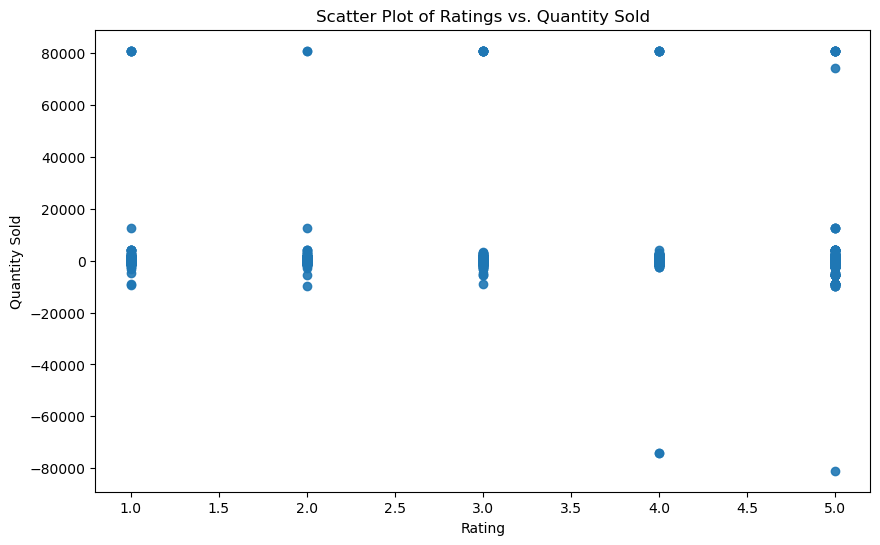

In [460]:
#Visual 1 - FILL IN"Scatter Plot of Ratings vs. Quantity Sold
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['Rating'], df_merge['Quantity'], alpha=.9)
plt.title('Scatter Plot of Ratings vs. Quantity Sold')
plt.xlabel('Rating')
plt.ylabel('Quantity Sold')
plt.show()

Purpose: The scatter plot visualizes the relationship between product ratings and the quantity sold.
Insights: If there is a positive correlation, we should see that higher-rated products generally have higher quantities sold.
The scatter plot you provided shows the relationship between Rating and Quantity Sold. Here’s a quick analysis:

Positive Trend: There seems to be a positive correlation; as the rating increases, the quantity sold generally increases too.
Variability: There’s significant variability in the quantity sold at all rating levels, indicating that while higher ratings might boost sales, other factors also play a role.
Overall, the plot is good for visualizing how ratings might impact sales,

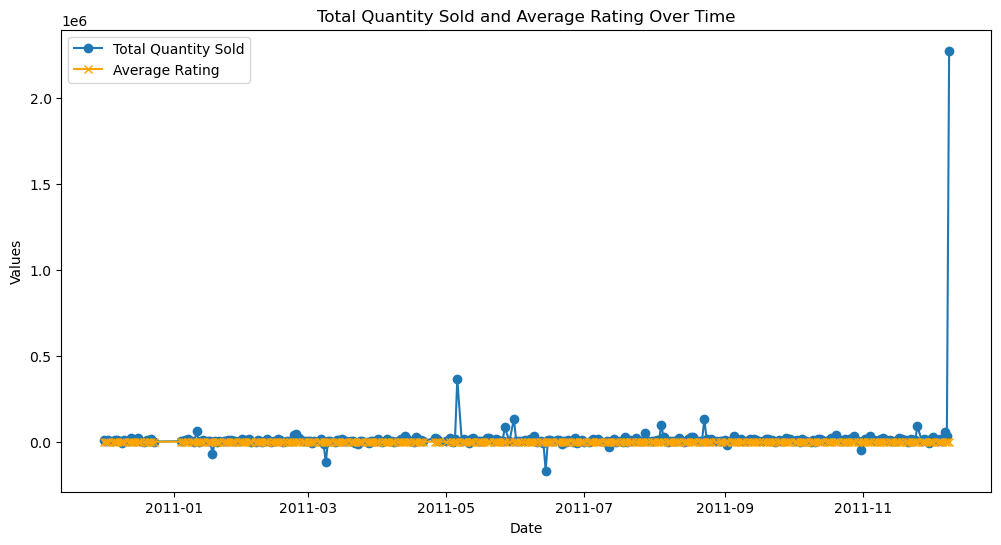

In [473]:
# Group by date and calculate mean rating and total quantity sold
time_series_analysis = df_merge.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Rating': 'mean'}).reset_index()

# Time-series plot
plt.figure(figsize=(12, 6))
plt.plot(time_series_analysis['InvoiceDate'], time_series_analysis['Quantity'], label='Total Quantity Sold', marker='o')
plt.plot(time_series_analysis['InvoiceDate'], time_series_analysis['Rating'], label='Average Rating', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Total Quantity Sold and Average Rating Over Time')
plt.legend()
plt.show()

Purpose: The time-series plot shows how average ratings and total quantities sold change over time.
Insights: This visualization can reveal any seasonal patterns or trends that might influence both ratings and sales. For example, we might see spikes in sales during certain periods, which can be compared with average ratings during the same periods.

By analyzing the scatter plot and the time-series plot, we can draw the following conclusions:

Scatter Plot Analysis: If the scatter plot shows a clear trend where higher ratings are associated with higher quantities sold, it suggests a positive relationship between social media sentiment (ratings) and e-commerce sales.
Time-Series Analysis: The time-series plot helps us understand how ratings and sales vary over time. For example, if high average ratings coincide with high sales volumes during certain periods, it reinforces the positive impact of social media sentiment on sales.
These visualizations provide valuable insights into how product ratings influence the quantity sold, helping to answer the research question effectively.

# 5.2: Reflection
If I had more time to complete the project, I would delve deeper into data quality by addressing potential inconsistencies in product descriptions and ensuring all customer and transaction records are complete and accurate. Additionally, I would explore further research questions such as the impact of customer demographics on purchasing behavior and the effect of seasonal trends on sales and ratings. Investigating sentiment analysis from social media comments and reviews could provide richer insights into how customer opinions directly influence e-commerce sales.